# Created Legends for the Experiments

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
projections = [64, 128, 256, 512, 1024, 2048, 4096, 8192]
def extract_metrics(file_path):
    # Data containers for each model
    models = ['mlp_relu', 'mlp_leaky_relu', 'mlp_sigmoid', 'mlp_tanh', 'mlp_linear']
    data = {model: {'lds_scores': [], 'avg_sparsity_orig': [], 'avg_sparsity_proj': [], 'avg_dist_corr': []} for model in models}

    # Regular expressions for extracting the relevant metrics
    lds_regex = re.compile(r"lds: tensor\(([\d.-]+)\)")  # Handle both positive and negative values
    avg_sparsity_orig_regex = re.compile(r"Average Sparsity of Original Gradients: ([\d.]+)")
    avg_sparsity_proj_regex = re.compile(r"Average Sparsity of Projected Gradients: ([\d.]+)")
    avg_dist_corr_regex = re.compile(r"Average Distance Correlation \(Original vs Projected\): ([\d.]+)")
    model_regex = re.compile(r"activation_fn', '(\w+)")

    current_model = None
    seen_lds = False  # To track if we've already captured the LDS value for the current projection

    with open(file_path, 'r') as file:
        for line in file:
            # Detect which model is being processed based on activation function
            model_match = model_regex.search(line)
            if model_match:
                activation_fn = model_match.group(1)
                current_model = f"mlp_{activation_fn}"
                seen_lds = False  # Reset LDS flag when switching to a new model

            if current_model:
                # Extract LDS scores (only the first time it appears per model/projection)
                if not seen_lds:
                    lds_match = lds_regex.search(line)
                    if lds_match:
                        lds_score = float(lds_match.group(1))
                        data[current_model]['lds_scores'].append(lds_score)
                        seen_lds = True  # Mark LDS as captured for this projection

                # Extract Average Sparsity of Original Gradients
                avg_sparsity_orig_match = avg_sparsity_orig_regex.search(line)
                if avg_sparsity_orig_match:
                    avg_sparsity_orig = float(avg_sparsity_orig_match.group(1))
                    data[current_model]['avg_sparsity_orig'].append(avg_sparsity_orig)

                # Extract Average Sparsity of Projected Gradients
                avg_sparsity_proj_match = avg_sparsity_proj_regex.search(line)
                if avg_sparsity_proj_match:
                    avg_sparsity_proj = float(avg_sparsity_proj_match.group(1))
                    data[current_model]['avg_sparsity_proj'].append(avg_sparsity_proj)

                # Extract Average Distance Correlation
                avg_dist_corr_match = avg_dist_corr_regex.search(line)
                if avg_dist_corr_match:
                    avg_dist_corr = float(avg_dist_corr_match.group(1))
                    data[current_model]['avg_dist_corr'].append(avg_dist_corr)

    return data, projections

# Path to your log file
log_file_path = './result/evaluate/log.out'
data, projections = extract_metrics(log_file_path)

# Print the extracted data for verification
for model in data:
    print(f"Model: {model}")
    print("LDS Scores:", data[model]['lds_scores'])
    print("Average Sparsity of Original Gradients:", data[model]['avg_sparsity_orig'])
    print("Average Sparsity of Projected Gradients:", data[model]['avg_sparsity_proj'])
    print("Average Distance Correlation:", data[model]['avg_dist_corr'])
    print()

Model: mlp_relu
LDS Scores: [0.3021, 0.3585, 0.4121, 0.4449, 0.4657, 0.4434, 0.2884, -0.0075]
Average Sparsity of Original Gradients: [0.5579, 0.5579, 0.5579, 0.5574, 0.5574, 0.5574, 0.5574, 0.5574]
Average Sparsity of Projected Gradients: [0.0837, 0.0837, 0.0837, 0.0825, 0.0825, 0.0825, 0.0825, 0.0825]
Average Distance Correlation: [0.9308, 0.9636, 0.9815, 0.9893, 0.9939, 0.9963, 0.9975, 0.998]

Model: mlp_leaky_relu
LDS Scores: [0.3049, 0.3642, 0.4149, 0.4488, 0.4696, 0.4459, 0.2954, 0.0081]
Average Sparsity of Original Gradients: [0.0842, 0.0842, 0.0842, 0.0831, 0.0831, 0.0831, 0.0831, 0.0831]
Average Sparsity of Projected Gradients: [0.0842, 0.0842, 0.0842, 0.0831, 0.0831, 0.0831, 0.0831, 0.0831]
Average Distance Correlation: [0.9307, 0.9636, 0.9815, 0.9893, 0.9939, 0.9963, 0.9974, 0.998]

Model: mlp_sigmoid
LDS Scores: [0.4635, 0.5306, 0.5754, 0.5803, 0.5285, 0.4278, 0.2941, -0.0017]
Average Sparsity of Original Gradients: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Average Sparsity 

## Full Set

In [3]:
def plot_metrics(data, projections, metric='lds_scores'):
    plt.figure(figsize=(12, 8))

    # Plot LDS Scores for each model
    for model in data:
        plt.plot(projections, data[model][metric], marker='o', linestyle='-', label=model)

    # Labels and title
    plt.xlabel('Projection Dimension')
    if metric == 'lds_scores':
        plt.ylabel('LDS (Linear Datamodeling Score)')
        plt.title('LDS Scores for Different Models Across Projection Dimensions')
    if metric == 'avg_sparsity_orig':
        plt.ylabel('Average Sparsity of Original Gradients')
        plt.title('Average Sparsity of Original Gradients for Different Models Across Projection Dimensions')
    if metric == 'avg_sparsity_proj':
        plt.ylabel('Average Sparsity of Projected Gradients')
        plt.title('Average Sparsity of Projected Gradients for Different Models Across Projection Dimensions')
    if metric == 'avg_dist_corr':
        plt.ylabel('Average Distance Correlation')
        plt.title('Average Distance Correlation for Different Models Across Projection Dimensions')
    plt.xticks(projections)
    plt.legend()

    # Show plot
    plt.show()

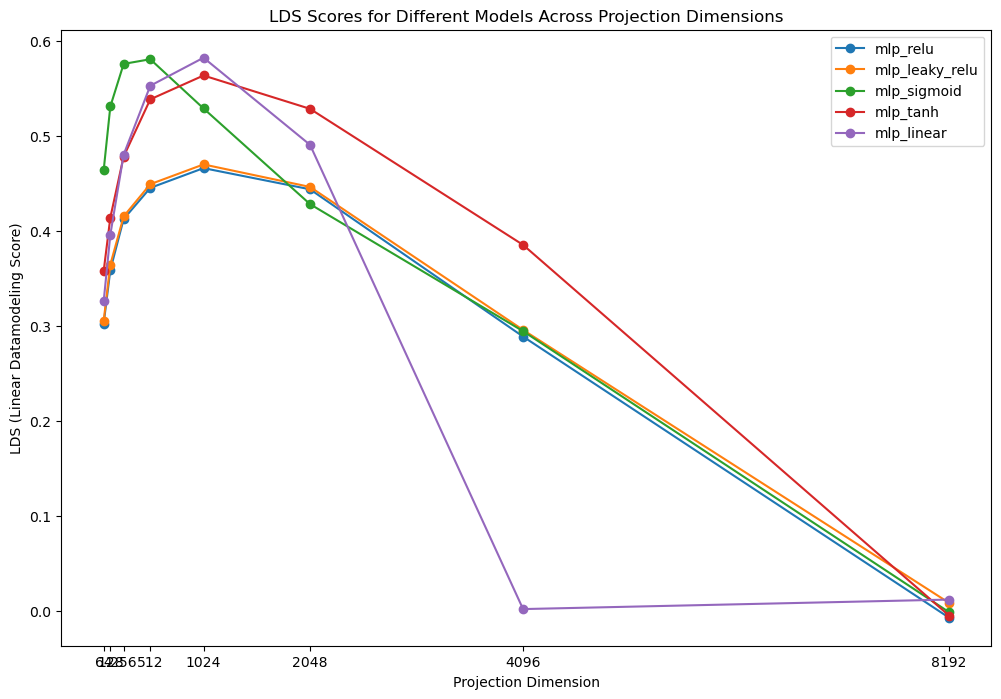

In [4]:
plot_metrics(data, projections, metric='lds_scores')

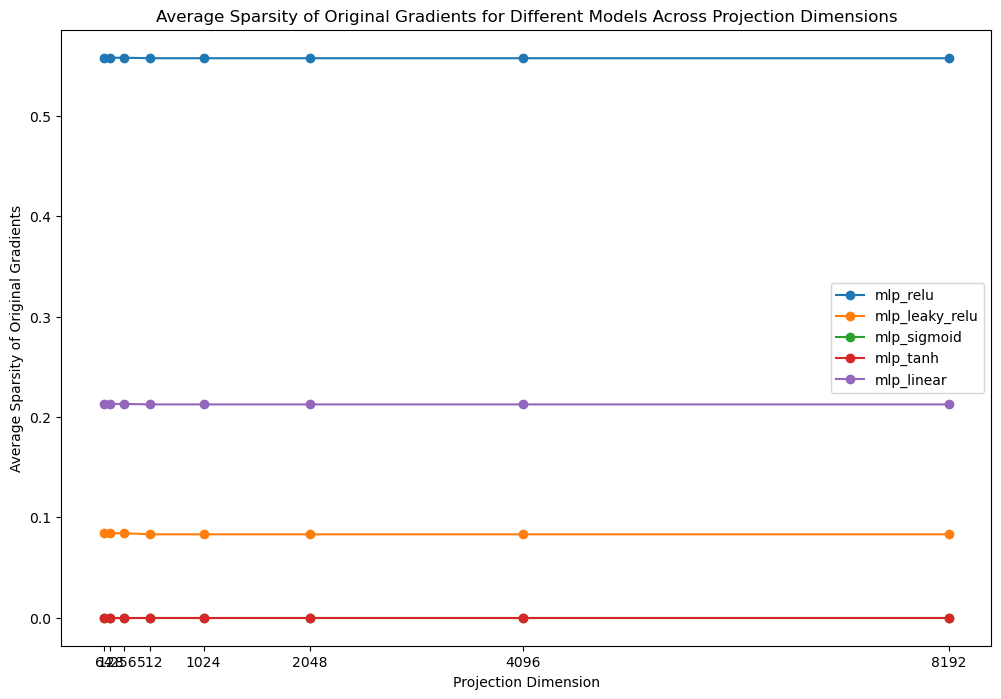

In [5]:
plot_metrics(data, projections, metric='avg_sparsity_orig')

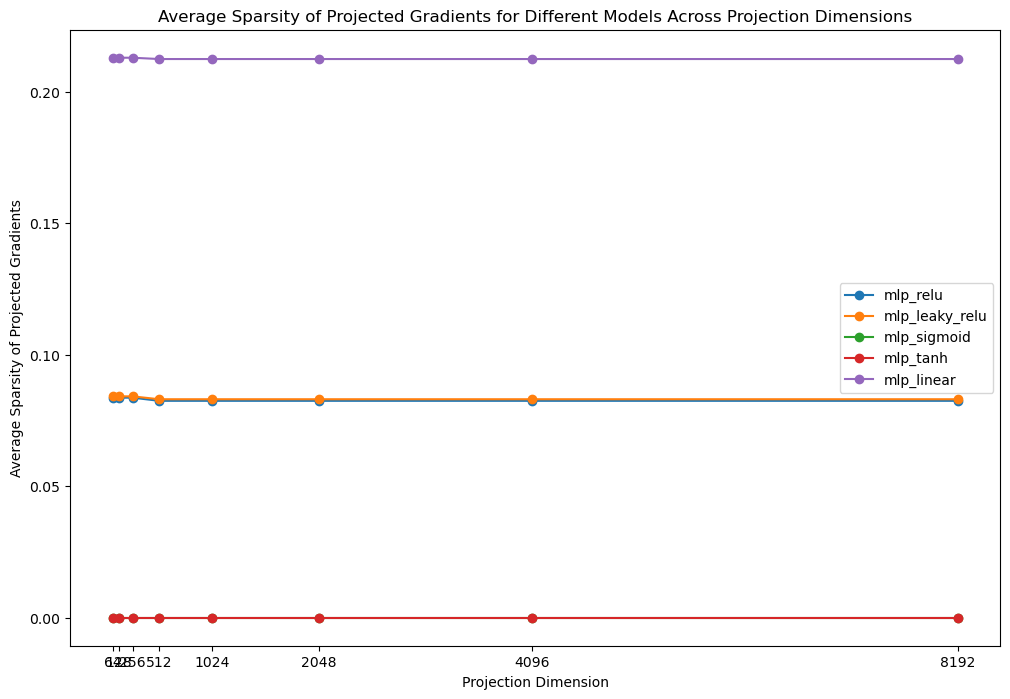

In [6]:
plot_metrics(data, projections, metric='avg_sparsity_proj')

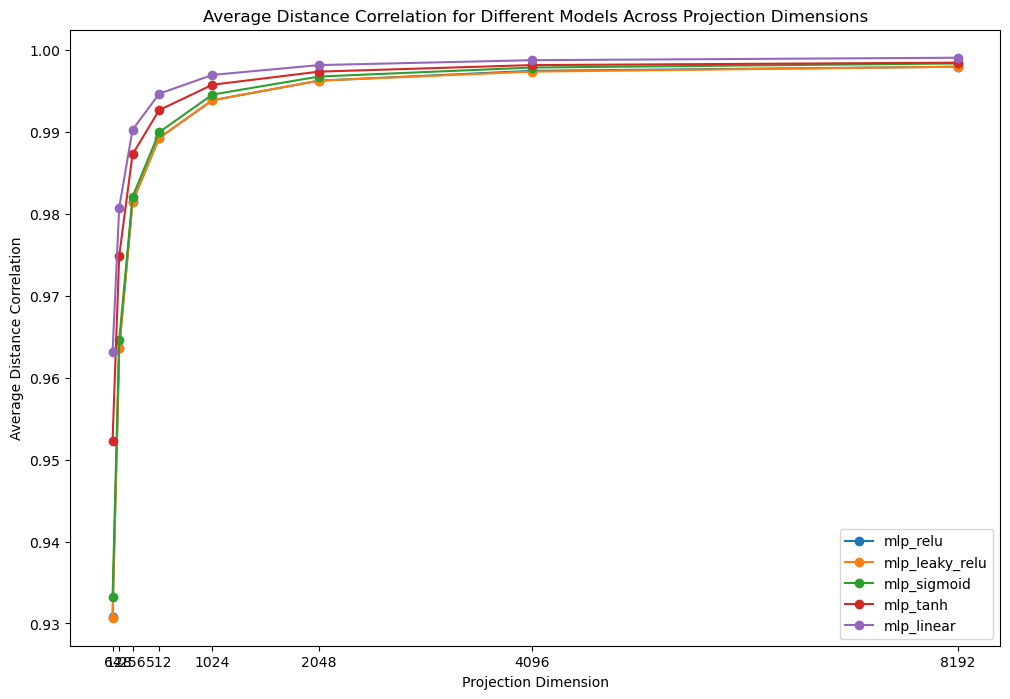

In [7]:
plot_metrics(data, projections, metric='avg_dist_corr')